We have $n$ points ${(x_1, y_1), (x_2, y_2), ..., (x_n, x_n)}$; we want to use the ${x_1, x_2, ... x_n}$ values to predict their corresponding $y$ values ${y_1, y_2, ..., y_n}$.

We want to do this using a straight line, with intercept $c$ and slope $b$, so our *predicted* values for $y$ will be ${c + bx_1, c + bx_2, ..., c + bx_n}$.

The errors for our predictions are therefore ${y_1 - (c + bx_1), y_2 - (c + bx_2), ..., y_n - (c + bx_n)}$.

We decide we have a good line when we have chosen $c$ and $b$ such that the sum of squares of the errors $SSE$ is minimimized:

$$
SSE = {y_1 - (c + bx_1) + y_2 - (c + bx_2) + ... + y_n - (c + bx_n)} \\
= \sum_{i=1}^n (y_i - (c + bx_i)^2
$$

The general procedure is to:

* Differentiate the equation above with respect to $c$, to get a formula for $c$ that minimizes the error.
* Substitute this formula back into the equation, to eliminate $c$, differentiate with respect to $b$, and solve for $b$.

In [1]:
# Sympy is Python's symbolic mathematics library.
from sympy import (symbols, summation, diff, IndexedBase, Add, Eq,
                   simplify, expand, solve)
# Render Sympy equations nicely in the notebook
from sympy.interactive import printing
printing.init_printing()

Build the equation for the sum of squared deviations.

In [2]:
# Symbols
i, n, c, b = symbols('i, n, c, b', integer=True, positive=True)
# The vector of observations to predict from.
x = IndexedBase('x')
# The vector of observations to predict.
y = IndexedBase('y')

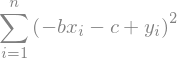

In [3]:
ss = summation((y[i] - (c + b * x[i]))**2, (i, 1, n))
ss

Expand and simplify the terms:

In [4]:
def expand_simplify_ss(f):
    ef = expand(f)
    # Simplify terms
    return Add(*[simplify(term).doit() for term in ef.args])

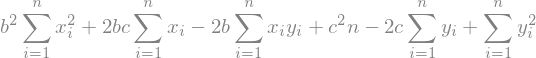

In [5]:
simple_ss = expand_simplify_ss(ss)
simple_ss

Differentiate this equation with respect to $c$:

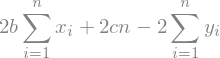

In [6]:
dSSE_dc = diff(simple_ss, c)
dSSE_dc

We find the minimum by setting equal to 0, and solving for $c$. 

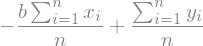

In [7]:
# Set derivative to 0, solve for c
solutions = solve(Eq(dSSE_dc, 0), c)
assert len(solutions) == 1
min_c = expand_simplify_ss(solutions[0])
min_c

This is the formula for $c$ that minimizes sum of squared error.  Notice it is the mean of $y$ minus the slope times the mean of $x$.

Substitute back into the full SSE formula to eliminate $c$ as a term.

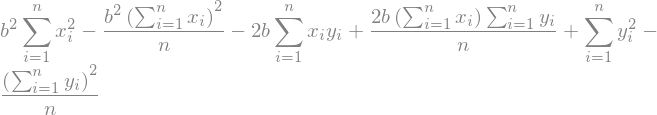

In [8]:
ss_min_c = expand_simplify_ss(simple_ss.subs(c, min_c))
ss_min_c

Differentiate with respect to $b$ to find the slope minimizing the sum of squared error:

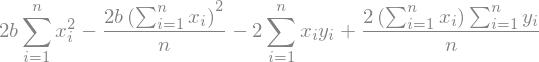

In [9]:
dSSE_min_c_db = diff(ss_min_c, b)
dSSE_min_c_db

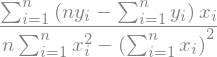

In [10]:
# Set derivative to 0, solve for b.
solutions = solve(Eq(dSSE_min_c_db, 0), b)
assert len(solutions) == 1
min_b = expand_simplify_ss(solutions[0])
min_b = simplify(min_b)
min_b

Notice we can also write this in terms of the mean-centered $x$ and $y$ vectors:

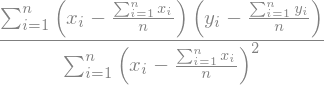

In [11]:
# Formula for the mean of x.
y_bar = 1 / n * summation(y[i], (i, 1, n))
# Formula for the mean of y.
x_bar = 1 / n * summation(x[i], (i, 1, n))
# Alternative formula for slope minimizing sum of squared error.
other_f = summation((y[i] - y_bar) * (x[i] - x_bar), (i, 1, n)) / summation((x[i] - x_bar) ** 2, (i, 1, n))
other_f

The `min_b` formula and the `other_f` formula above are equivalent:

In [12]:
simplify(expand_simplify_ss(min_b - other_f))